### NLP with Scikit-Learn : SMS Spam Dataset

In [1]:
import nltk

In [2]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  d



Download which package (l=list; x=cancel)?


  Identifier>  all


       | 
       | Downloading package abc to /home/johnadi/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /home/johnadi/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package averaged_perceptron_tagger to
       |     /home/johnadi/nltk_data...
       |   Package averaged_perceptron_tagger is already up-to-date!
       | Downloading package averaged_perceptron_tagger_ru to
       |     /home/johnadi/nltk_data...
       |   Package averaged_perceptron_tagger_ru is already up-to-
       |       date!
       | Downloading package basque_grammars to
       |     /home/johnadi/nltk_data...
       |   Package basque_grammars is already up-to-date!
       | Downloading package bcp47 to /home/johnadi/nltk_data...
       |   Package bcp47 is already up-to-date!
       | Downloading package biocreative_ppi to
       |     /home/johnadi/nltk_data...
       |   Package biocreative_ppi is already up-to-date!
   


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  q


True

In [3]:
# SMS spam dataset
!head sms+spam+collection/SMSSpamCollection

head: cannot open 'sms+spam+collection/SMSSpamCollection' for reading: No such file or directory


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("SMSSpamCollection", sep="\t", names=["label", "text"])

In [6]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### EDA

In [7]:
df.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
df.groupby("label").describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

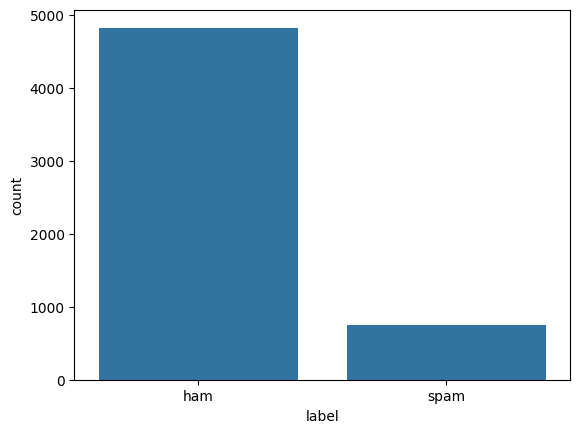

In [9]:
sns.countplot(data=df, x="label");

#### Feature Engineering

In [10]:
df['text'][0], len(df['text'][0])

('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 111)

In [11]:
df['length'] = df['text'].apply(len)

In [12]:
df.head()

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


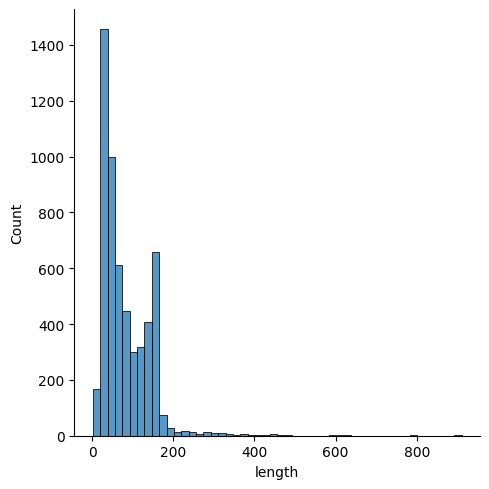

In [13]:
sns.displot(df["length"], bins=50);

In [14]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [15]:
df[df['length'] == 910]['text'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [16]:
df[df['length'] == 2]['text'].iloc[0]

'Ok'

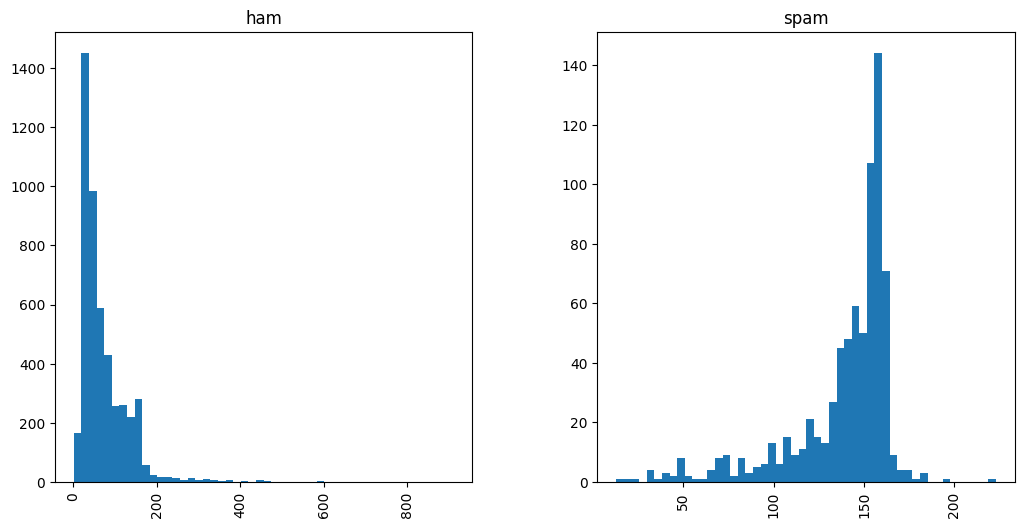

In [17]:
df.hist(column="length", by="label", bins=50, figsize=(12,6))
plt.show()

#### Text Pre-Processing

In [18]:
from nltk.corpus import stopwords
import string

In [19]:
stopwords.words("english")[1:20]

['me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [20]:
len(stopwords.words("english"))

179

In [21]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
def text_processing(text):
    # remove punctuation
    remove_punc = [c for c in text if c not in string.punctuation]
    # Join punc together
    remove_punc = ''.join(remove_punc)
    # remove stopwords
    return [w for w in remove_punc.split() if w.lower() not in stopwords.words('english')]

In [23]:
df.head()

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
df['text'].apply(text_processing)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, U, £750, Pou...
5568                   [ü, b, going, esplanade, fr, home]
5569                     [Pity, mood, Soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [Rofl, true, name]
Name: text, Length: 5572, dtype: object

#### Vectorization

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
cv_transformer = CountVectorizer(analyzer=text_processing).fit(df['text'])

In [27]:
len(cv_transformer.vocabulary_)

11425

In [28]:
text_0 = df['text'][2]
text_0

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [29]:
bow_0 = cv_transformer.transform([text_0])
bow_0

<1x11425 sparse matrix of type '<class 'numpy.int64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [30]:
print(bow_0)

  (0, 73)	1
  (0, 423)	1
  (0, 430)	1
  (0, 443)	1
  (0, 871)	1
  (0, 1551)	1
  (0, 1833)	2
  (0, 1941)	1
  (0, 2804)	1
  (0, 3953)	1
  (0, 4731)	1
  (0, 5619)	1
  (0, 6331)	2
  (0, 6557)	1
  (0, 9159)	1
  (0, 9200)	1
  (0, 9252)	1
  (0, 10512)	1
  (0, 10686)	1
  (0, 11084)	1
  (0, 11123)	1


In [31]:
print(bow_0.shape)

(1, 11425)


In [32]:
df['text'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [33]:
cv_transformer.get_feature_names_out()[6331], cv_transformer.get_feature_names_out()[1833]

('entry', 'FA')

In [34]:
text_messages_bow = cv_transformer.transform(df['text'])

In [35]:
print(f"Shape of the Sparse Matrix: {text_messages_bow.shape}")
print(f"Amount of Non-Zero Occurences: {text_messages_bow.nnz}")

Shape of the Sparse Matrix: (5572, 11425)
Amount of Non-Zero Occurences: 50548


In [36]:
sparcity = text_messages_bow.nnz / (text_messages_bow.shape[0] * text_messages_bow.shape[1])*100

In [37]:
print(f"Sparcity: {sparcity}")

Sparcity: 0.07940295412668218


#### TF-IDF

In [38]:
from sklearn.feature_extraction.text import TfidfTransformer

In [41]:
tfidf_transformer = TfidfTransformer().fit(text_messages_bow)

In [42]:
tfidf_0 = tfidf_transformer.transform(bow_0)

In [44]:
print(tfidf_0)

  (0, 11123)	0.19104387220509106
  (0, 11084)	0.15898145347176754
  (0, 10686)	0.13995540820792943
  (0, 10512)	0.2118842499614227
  (0, 9252)	0.16121646071144807
  (0, 9200)	0.22538631044314436
  (0, 9159)	0.22538631044314436
  (0, 6557)	0.18466951562322612
  (0, 6331)	0.347904654589528
  (0, 5619)	0.1887440015250524
  (0, 4731)	0.16452475271486866
  (0, 3953)	0.1544015632869991
  (0, 2804)	0.17524194104333074
  (0, 1941)	0.1526581729225716
  (0, 1833)	0.4507726208862887
  (0, 1551)	0.2177823443125605
  (0, 871)	0.2118842499614227
  (0, 443)	0.2177823443125605
  (0, 430)	0.2177823443125605
  (0, 423)	0.09639170919810956
  (0, 73)	0.22538631044314436


In [45]:
cv_transformer.get_feature_names_out()[423]

'2'

In [48]:
print(tfidf_transformer.idf_[cv_transformer.vocabulary_['think']])

4.863514852771781


In [49]:
text_tfidf = tfidf_transformer.transform(text_messages_bow)

In [50]:
text_tfidf.shape

(5572, 11425)

#### NLP and Naive Bayes 

#### Pipelines

In [52]:
from sklearn.naive_bayes import MultinomialNB

In [58]:
nb = MultinomialNB().fit(text_tfidf, df['label'])

In [59]:
print(tfidf_0[0])

  (0, 11123)	0.19104387220509106
  (0, 11084)	0.15898145347176754
  (0, 10686)	0.13995540820792943
  (0, 10512)	0.2118842499614227
  (0, 9252)	0.16121646071144807
  (0, 9200)	0.22538631044314436
  (0, 9159)	0.22538631044314436
  (0, 6557)	0.18466951562322612
  (0, 6331)	0.347904654589528
  (0, 5619)	0.1887440015250524
  (0, 4731)	0.16452475271486866
  (0, 3953)	0.1544015632869991
  (0, 2804)	0.17524194104333074
  (0, 1941)	0.1526581729225716
  (0, 1833)	0.4507726208862887
  (0, 1551)	0.2177823443125605
  (0, 871)	0.2118842499614227
  (0, 443)	0.2177823443125605
  (0, 430)	0.2177823443125605
  (0, 423)	0.09639170919810956
  (0, 73)	0.22538631044314436


In [60]:
text_0

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [61]:
pred = nb.predict(tfidf_0)[0]

In [62]:
expected = df['label'][2]
print(f"Predicted Value: {pred}\nExpected Value: {expected}")

Predicted Value: spam
Expected Value: spam


#### Model Evaluation

In [63]:
all_predictions = nb.predict(text_tfidf)

In [64]:
all_predictions

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [65]:
from sklearn.metrics import classification_report

In [67]:
print(classification_report(df['label'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



#### Train test split

In [68]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.33, random_state=42)

#### Pipeline

In [71]:
from sklearn.pipeline import Pipeline

In [72]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_processing)), # strings to tokens
    ('tfidf', TfidfTransformer()), # Tf-idf scores
    ('classifier', MultinomialNB()) # Train model using TF-IDF with NB
])

In [73]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_processing at 0x71d795078a60>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [74]:
predictions = pipeline.predict(X_test)

In [75]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1658
        spam       0.74      1.00      0.85       181

    accuracy                           0.96      1839
   macro avg       0.87      0.98      0.91      1839
weighted avg       0.97      0.96      0.97      1839

